In [87]:
!pip install pandas

In [88]:
import numpy as np
import pandas as pd

In [89]:
# Lectura de datos
from sklearn.svm import SVC

# Procesamiento de datos
import random
import albumentations as A

# Análisis de datos.
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de datos y Evaluación de modelos.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
from sklearn.model_selection import train_test_split , KFold , StratifiedKFold



from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score , ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, median_absolute_error, mean_absolute_error

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# Ruta de la base de datos.
data = pd.read_excel('/content/drive/MyDrive/RetoDataScience/Datos_anonimizados_sin_llave.xlsx')
data

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,MES,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,...,DiasEstanciaClinica,DiasEstanciaClinica_exacto,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Transfusiones,Antioboticos,UCI_UCE
0,1,0,62,2022,Abril,2,69,1,43,3,...,1,1.048533,2,4,155,1,0,NO,NO,NO
1,2,1,89,2022,Marzo,2,48,2,32,7,...,4,3.943370,4,7,561,0,0,NO,NO,NO
2,3,1,90,2023,Septiembre,2,48,2,43,3,...,2,1.794684,4,8,5,0,2,NO,SI,NO
3,4,1,88,2022,Enero,2,69,1,43,3,...,3,2.564836,4,8,1,0,0,NO,SI,NO
4,5,0,89,2023,Agosto,3,69,1,43,3,...,5,5.486410,4,8,167,0,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,0,19,2023,Septiembre,2,48,1,43,3,...,2,2.565230,4,8,171,1,0,NO,NO,NO
43150,43151,0,31,2023,Septiembre,2,48,1,43,3,...,1,1.837406,4,8,555,1,0,NO,NO,NO
43151,43152,0,13,2023,Septiembre,2,48,1,43,8,...,1,1.015388,4,10,478,0,0,NO,NO,NO
43152,43153,1,6,2023,Septiembre,1,26,1,43,3,...,2,1.582988,4,10,242,0,0,NO,SI,NO


In [92]:
vGenero = data['vGenero']
# Imprimir la columna extraída
print(vGenero )

# Calcular la longitud de la columna
longitud = len(vGenero )
print(f'Longitud de la columna: {longitud}')

0        0
1        1
2        1
3        1
4        0
        ..
43149    0
43150    0
43151    0
43152    1
43153    0
Name: vGenero, Length: 43154, dtype: int64
Longitud de la columna: 43154


In [93]:
# Eliminamos columnas no deseadas

data_procesados = data.drop(['vGenero', 'piso', 'Aseguradora', 'Tipo_Afiliacion', 'Modalidad_Contrato', 'Transfusiones', 'Antioboticos', 'ID_Medico_registra', 'NombreTipoDiagnostico', 'bloque', 'Aseguradora2', 'MODALIDAD', 'ESPECIALIDAD_GRD', 'Hospitalizacion', 'Tipo_Internacion', 'UCI_UCE','D_DX_PPAL','D_capitulo_DX_Muerte'] , axis=1)
data_procesados

,AntencionPaciente llave,EdadEgreso,Año_Salida,MES,Ciclo_Vital,DX_PRINCIPAL,D_Capitulo_CIE10,RangoCapitulo,Categoria,D_subcapitulo_CIE10,...,D_Subcapitulo_DX_Muerte,Subcapitulo_DX_Muerte,capitulo_DX_Muerte,ClasificacionCronico_DX_MUERTE,HorasdeAlta,DiasEstanciaServicio,DiasEstanciaClinica,DiasEstanciaClinica_exacto,SERVICIO_ADMITE,Tipo_egreso
0,1,62,2022,Abril,5,H811,H60-H95,H81,TRASTORNOS DE LA FUNCION VESTIBULAR,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,48,1,1,1.048533,4,0
1,2,89,2022,Marzo,5,J441,J00-J99,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,24,4,4,3.943370,7,0
2,3,90,2023,Septiembre,5,J440,J00-J99,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Sin información,...,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J44,J00-J99,epoc,48,1,2,1.794684,8,2
3,4,88,2022,Enero,5,J841,J00-J99,J84,OTRAS ENFERMEDADES PULMONARES INTERSTICIALES,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,48,1,3,2.564836,8,0
4,5,89,2023,Agosto,5,S024,S00-T98,S02,FRACTURA DE HUESOS DEL CRANEO Y DE LA CARA,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,24,4,5,5.486410,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,19,2023,Septiembre,3,G409,G00-G99,G40,EPILEPSIA,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,120,2,2,2.565230,8,0
43150,43151,31,2023,Septiembre,1,K118,K00-K93,K11,ENFERMEDADES DE LAS GLANDULAS SALIVALES,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,72,1,1,1.837406,8,0
43151,43152,13,2023,Septiembre,0,F412,F00-F99,F41,OTROS TRASTORNOS DE ANSIEDAD,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,0,1,1,1.015388,10,0
43152,43153,6,2023,Septiembre,2,S424,S00-T98,S42,FRACTURA DEL HOMBRO Y DEL BRAZO,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,144,1,2,1.582988,10,0


In [94]:

print('Número de muestras duplicadas: %d'%(data_procesados.duplicated().sum()))
print('Número total de muestras: %d'%(data_procesados.isnull().value_counts().sum()))
data_procesados.columns

Número de muestras duplicadas: 0
Número total de muestras: 43154


Index(['AntencionPaciente llave', 'EdadEgreso', 'Año_Salida', 'MES',
       'Ciclo_Vital', 'DX_PRINCIPAL', 'D_Capitulo_CIE10', 'RangoCapitulo',
       'Categoria', 'D_subcapitulo_CIE10', 'DescSubgrupoOncologia',
       'SubgrupoOncologia', 'ClasificacionCronico_DX_Principal', 'DX_MEDICO',
       'D_DX_MEDICO', 'ClasificacionCronico_DX_Medico', 'DX_R1', 'D_DX_R1',
       'ClasificacionCronico_DX_R1', 'DX_R2', 'D_DX_R2',
       'ClasificacionCronico_DX_R2', 'DX_R3', 'D_DX_R3',
       'ClasificacionCronico_DX_R3', 'DX_F3', 'D_DX_F3',
       'ClasificacionCronico_DX_F3', 'DX_F3_R1', 'D_DX_F3_R1',
       'ClasificacionCronico_DX_F3_R1', 'DX_F3_R2', 'D_DX_F3_R2',
       'ClasificacionCronico_DX_F3_R2', 'DX_F3_R3', 'D_DX_F3_R3',
       'ClasificacionCronico_DX_F3_R3', 'DX_pre_cx', 'D_DX_pre_cx',
       'ClasificacionCronico_DX_pre_cx', 'DX_pos_cx', 'D_DX_pos_cx',
       'ClasificacionCronico_DX_pos_cx', 'DX_MUERTE', 'D_DX_MUERTE',
       'D_Subcapitulo_DX_Muerte', 'Subcapitulo_DX_Muerte',
   

In [95]:
data_procesados = data_procesados.fillna(0)
data_procesados

,AntencionPaciente llave,EdadEgreso,Año_Salida,MES,Ciclo_Vital,DX_PRINCIPAL,D_Capitulo_CIE10,RangoCapitulo,Categoria,D_subcapitulo_CIE10,...,D_Subcapitulo_DX_Muerte,Subcapitulo_DX_Muerte,capitulo_DX_Muerte,ClasificacionCronico_DX_MUERTE,HorasdeAlta,DiasEstanciaServicio,DiasEstanciaClinica,DiasEstanciaClinica_exacto,SERVICIO_ADMITE,Tipo_egreso
0,1,62,2022,Abril,5,H811,H60-H95,H81,TRASTORNOS DE LA FUNCION VESTIBULAR,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,48,1,1,1.048533,4,0
1,2,89,2022,Marzo,5,J441,J00-J99,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,24,4,4,3.943370,7,0
2,3,90,2023,Septiembre,5,J440,J00-J99,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Sin información,...,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J44,J00-J99,epoc,48,1,2,1.794684,8,2
3,4,88,2022,Enero,5,J841,J00-J99,J84,OTRAS ENFERMEDADES PULMONARES INTERSTICIALES,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,48,1,3,2.564836,8,0
4,5,89,2023,Agosto,5,S024,S00-T98,S02,FRACTURA DE HUESOS DEL CRANEO Y DE LA CARA,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,24,4,5,5.486410,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,19,2023,Septiembre,3,G409,G00-G99,G40,EPILEPSIA,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,120,2,2,2.565230,8,0
43150,43151,31,2023,Septiembre,1,K118,K00-K93,K11,ENFERMEDADES DE LAS GLANDULAS SALIVALES,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,72,1,1,1.837406,8,0
43151,43152,13,2023,Septiembre,0,F412,F00-F99,F41,OTROS TRASTORNOS DE ANSIEDAD,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,0,1,1,1.015388,10,0
43152,43153,6,2023,Septiembre,2,S424,S00-T98,S42,FRACTURA DEL HOMBRO Y DEL BRAZO,Sin información,...,Sin informacion en base de datos,-1,-1,Sin Informacion,144,1,2,1.582988,10,0


In [96]:
data_procesados.replace("Sin Informacion",0, inplace=True)
data_procesados

,AntencionPaciente llave,EdadEgreso,Año_Salida,MES,Ciclo_Vital,DX_PRINCIPAL,D_Capitulo_CIE10,RangoCapitulo,Categoria,D_subcapitulo_CIE10,...,D_Subcapitulo_DX_Muerte,Subcapitulo_DX_Muerte,capitulo_DX_Muerte,ClasificacionCronico_DX_MUERTE,HorasdeAlta,DiasEstanciaServicio,DiasEstanciaClinica,DiasEstanciaClinica_exacto,SERVICIO_ADMITE,Tipo_egreso
0,1,62,2022,Abril,5,H811,H60-H95,H81,TRASTORNOS DE LA FUNCION VESTIBULAR,Sin información,...,Sin informacion en base de datos,-1,-1,0,48,1,1,1.048533,4,0
1,2,89,2022,Marzo,5,J441,J00-J99,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Sin información,...,Sin informacion en base de datos,-1,-1,0,24,4,4,3.943370,7,0
2,3,90,2023,Septiembre,5,J440,J00-J99,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Sin información,...,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J44,J00-J99,epoc,48,1,2,1.794684,8,2
3,4,88,2022,Enero,5,J841,J00-J99,J84,OTRAS ENFERMEDADES PULMONARES INTERSTICIALES,Sin información,...,Sin informacion en base de datos,-1,-1,0,48,1,3,2.564836,8,0
4,5,89,2023,Agosto,5,S024,S00-T98,S02,FRACTURA DE HUESOS DEL CRANEO Y DE LA CARA,Sin información,...,Sin informacion en base de datos,-1,-1,0,24,4,5,5.486410,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,19,2023,Septiembre,3,G409,G00-G99,G40,EPILEPSIA,Sin información,...,Sin informacion en base de datos,-1,-1,0,120,2,2,2.565230,8,0
43150,43151,31,2023,Septiembre,1,K118,K00-K93,K11,ENFERMEDADES DE LAS GLANDULAS SALIVALES,Sin información,...,Sin informacion en base de datos,-1,-1,0,72,1,1,1.837406,8,0
43151,43152,13,2023,Septiembre,0,F412,F00-F99,F41,OTROS TRASTORNOS DE ANSIEDAD,Sin información,...,Sin informacion en base de datos,-1,-1,0,0,1,1,1.015388,10,0
43152,43153,6,2023,Septiembre,2,S424,S00-T98,S42,FRACTURA DEL HOMBRO Y DEL BRAZO,Sin información,...,Sin informacion en base de datos,-1,-1,0,144,1,2,1.582988,10,0


In [97]:
data_procesados.replace("Sin informacion en base de datos",0, inplace=True)
data_procesados

,AntencionPaciente llave,EdadEgreso,Año_Salida,MES,Ciclo_Vital,DX_PRINCIPAL,D_Capitulo_CIE10,RangoCapitulo,Categoria,D_subcapitulo_CIE10,...,D_Subcapitulo_DX_Muerte,Subcapitulo_DX_Muerte,capitulo_DX_Muerte,ClasificacionCronico_DX_MUERTE,HorasdeAlta,DiasEstanciaServicio,DiasEstanciaClinica,DiasEstanciaClinica_exacto,SERVICIO_ADMITE,Tipo_egreso
0,1,62,2022,Abril,5,H811,H60-H95,H81,TRASTORNOS DE LA FUNCION VESTIBULAR,Sin información,...,0,-1,-1,0,48,1,1,1.048533,4,0
1,2,89,2022,Marzo,5,J441,J00-J99,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Sin información,...,0,-1,-1,0,24,4,4,3.943370,7,0
2,3,90,2023,Septiembre,5,J440,J00-J99,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,Sin información,...,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J44,J00-J99,epoc,48,1,2,1.794684,8,2
3,4,88,2022,Enero,5,J841,J00-J99,J84,OTRAS ENFERMEDADES PULMONARES INTERSTICIALES,Sin información,...,0,-1,-1,0,48,1,3,2.564836,8,0
4,5,89,2023,Agosto,5,S024,S00-T98,S02,FRACTURA DE HUESOS DEL CRANEO Y DE LA CARA,Sin información,...,0,-1,-1,0,24,4,5,5.486410,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,19,2023,Septiembre,3,G409,G00-G99,G40,EPILEPSIA,Sin información,...,0,-1,-1,0,120,2,2,2.565230,8,0
43150,43151,31,2023,Septiembre,1,K118,K00-K93,K11,ENFERMEDADES DE LAS GLANDULAS SALIVALES,Sin información,...,0,-1,-1,0,72,1,1,1.837406,8,0
43151,43152,13,2023,Septiembre,0,F412,F00-F99,F41,OTROS TRASTORNOS DE ANSIEDAD,Sin información,...,0,-1,-1,0,0,1,1,1.015388,10,0
43152,43153,6,2023,Septiembre,2,S424,S00-T98,S42,FRACTURA DEL HOMBRO Y DEL BRAZO,Sin información,...,0,-1,-1,0,144,1,2,1.582988,10,0


In [98]:
data_procesados.replace("Sin información",0, inplace=True)
data_procesados

,AntencionPaciente llave,EdadEgreso,Año_Salida,MES,Ciclo_Vital,DX_PRINCIPAL,D_Capitulo_CIE10,RangoCapitulo,Categoria,D_subcapitulo_CIE10,...,D_Subcapitulo_DX_Muerte,Subcapitulo_DX_Muerte,capitulo_DX_Muerte,ClasificacionCronico_DX_MUERTE,HorasdeAlta,DiasEstanciaServicio,DiasEstanciaClinica,DiasEstanciaClinica_exacto,SERVICIO_ADMITE,Tipo_egreso
0,1,62,2022,Abril,5,H811,H60-H95,H81,TRASTORNOS DE LA FUNCION VESTIBULAR,0,...,0,-1,-1,0,48,1,1,1.048533,4,0
1,2,89,2022,Marzo,5,J441,J00-J99,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,0,...,0,-1,-1,0,24,4,4,3.943370,7,0
2,3,90,2023,Septiembre,5,J440,J00-J99,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,0,...,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J44,J00-J99,epoc,48,1,2,1.794684,8,2
3,4,88,2022,Enero,5,J841,J00-J99,J84,OTRAS ENFERMEDADES PULMONARES INTERSTICIALES,0,...,0,-1,-1,0,48,1,3,2.564836,8,0
4,5,89,2023,Agosto,5,S024,S00-T98,S02,FRACTURA DE HUESOS DEL CRANEO Y DE LA CARA,0,...,0,-1,-1,0,24,4,5,5.486410,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,19,2023,Septiembre,3,G409,G00-G99,G40,EPILEPSIA,0,...,0,-1,-1,0,120,2,2,2.565230,8,0
43150,43151,31,2023,Septiembre,1,K118,K00-K93,K11,ENFERMEDADES DE LAS GLANDULAS SALIVALES,0,...,0,-1,-1,0,72,1,1,1.837406,8,0
43151,43152,13,2023,Septiembre,0,F412,F00-F99,F41,OTROS TRASTORNOS DE ANSIEDAD,0,...,0,-1,-1,0,0,1,1,1.015388,10,0
43152,43153,6,2023,Septiembre,2,S424,S00-T98,S42,FRACTURA DEL HOMBRO Y DEL BRAZO,0,...,0,-1,-1,0,144,1,2,1.582988,10,0


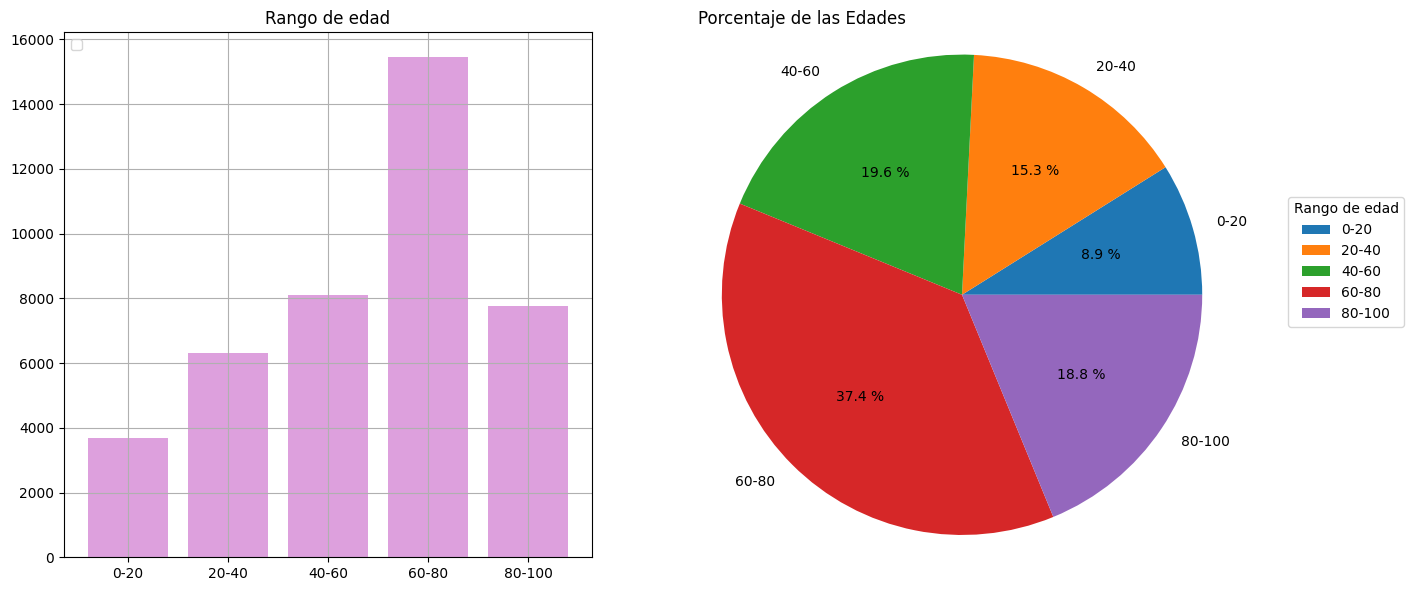

In [99]:
#Se realiza un diagrama de barras y un diagrama circular para la variable edad

#Se establece una lista con los datos de la variable edad y se redondean los valores
Age_round = list(round(data_procesados['EdadEgreso'].dropna()))

#Se establecen rangos de la edad con el fin de obtener una mejor visualización
#Sujetos menores de 20 año
range_1 = [x for x in Age_round if x <=20]
#Sujetos mayores de 20 años y menores de 40 años
range_2 = [x for x in Age_round if x >20 and x<40]
#Sujetos mayores de 40 años y menores de 60 años
range_3 = [x for x in Age_round if x >40 and x<60]
#Sujetos mayores de 60 años y menores de 80 años
range_4 = [x for x in Age_round if x >60 and x<80]
#Sujetos mayores de 80 años y menores de 100 años
range_5 = [x for x in Age_round if x >80 and x<100]

#Se establece la longitud para cada rango
range1_len=len(range_1)
range2_len=len(range_2)
range3_len=len(range_3)
range4_len=len(range_4)
range5_len=len(range_5)

#Se crea el vector que contiene la cantidad de sujetos en un rango determinado
count_edad = [range1_len,range2_len,range3_len,range4_len,range5_len]
# Se establece un vector que presenta los rangos especificos
age_label = ['0-20','20-40','40-60','60-80','80-100']

#Grficos
plt.figure(1, figsize = (15,15))

#Diagrama de barras
#Ancho de las barras
ancho_barras = 0.8

plt.subplot(2, 2, 1)
plt.bar(age_label,
          count_edad,
          color = 'plum',
          width = ancho_barras)
plt.grid()
plt.title('Rango de edad')
plt.legend(loc='upper left')

#Grafico circular
plt.subplot(2, 2, 2)
plt.pie(count_edad, labels=age_label, autopct="%0.1f %%")
plt.axis("equal")
plt.legend(["0-20","20-40","40-60","60-80","80-100"], bbox_to_anchor=(0.35, -0.3, 1, 1), loc=0, title= 'Rango de edad')
plt.title('Porcentaje de las Edades',loc='left')

plt.show()

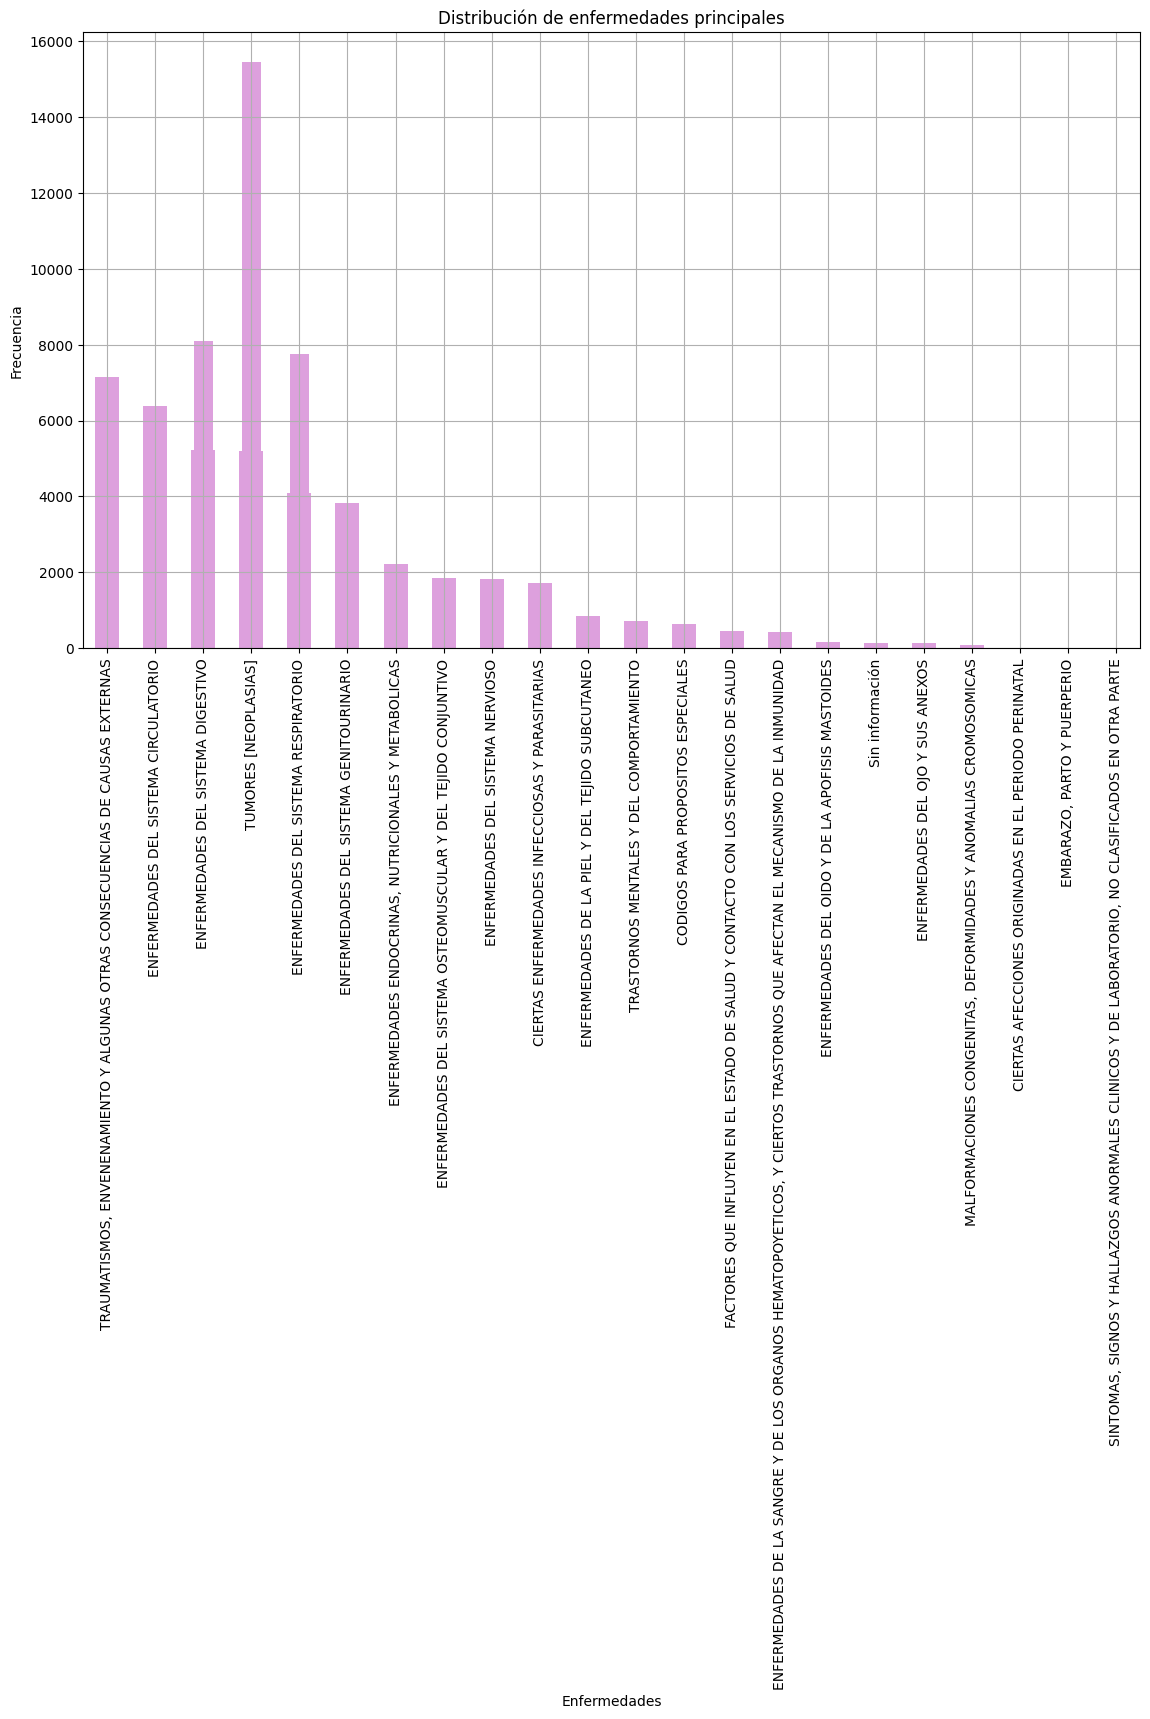

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame df_final con una columna 'D_DX_PPAL' que contiene nombres de enfermedades.

# Para contar la frecuencia de cada enfermedad en la columna 'D_DX_PPAL'
value_counts = data['D_DX_PPAL'].value_counts()

# Ajustar el tamaño de la figura
plt.figure(figsize=(30, 8))

# Crear un gráfico de barras
plt.subplot(1, 2, 1)
ancho_barras = 0.4
plt.bar(age_label,
          count_edad,
          color = 'plum',
          width = ancho_barras)
value_counts.plot(kind='bar', color='plum')
plt.title('Distribución de enfermedades principales')
plt.xlabel('Enfermedades')
plt.ylabel('Frecuencia')
plt.grid()
plt.savefig('/content/drive/My Drive/nombre_de_archivo1.png')  # Reemplaza 'nombre_de_archivo.png' con el nombre que desees


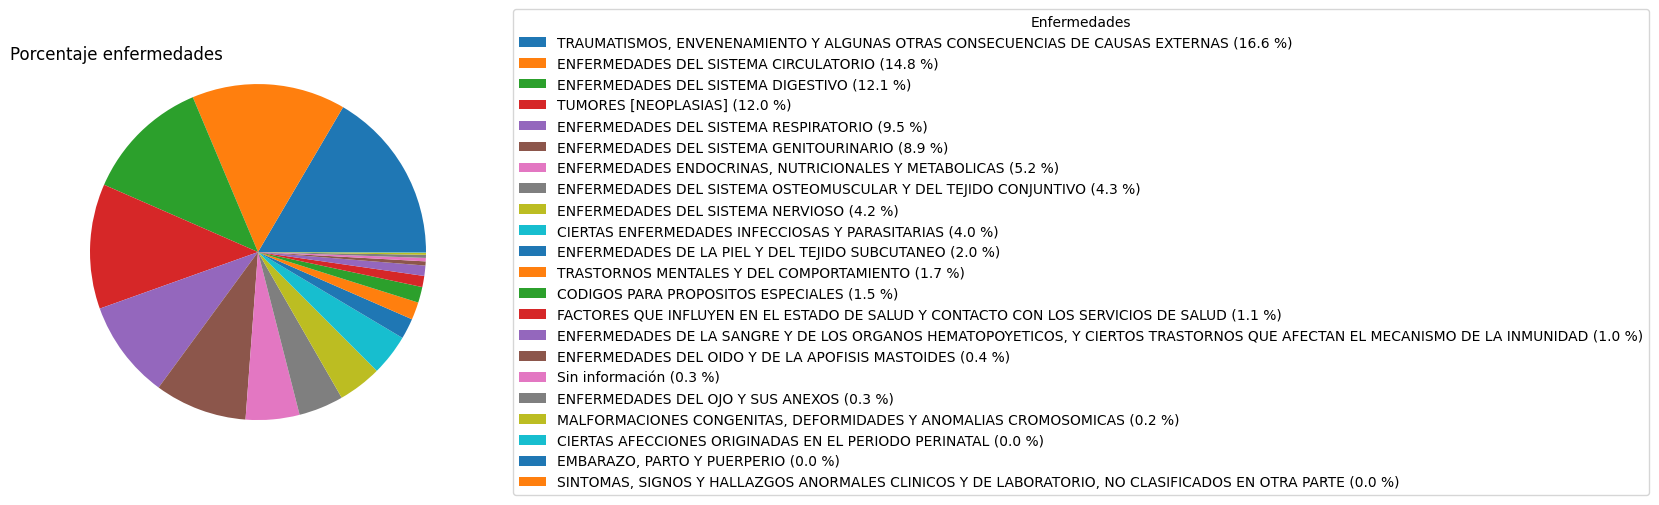

In [101]:
# Crear un gráfico circular con nombres de enfermedades y porcentajes
total = value_counts.sum()
labels = [f"{enfermedad} ({porcentaje:.1f} %)"for enfermedad, porcentaje in zip(value_counts.index,(value_counts /total)*100 )]
plt.pie(value_counts, labels=None, )
plt.axis("equal")
plt.legend(["0-20","20-40","40-60","60-80","80-100"], bbox_to_anchor=(0.35, -0.3, 5, 5), loc=0, title= 'RPorcentaje enfermedades')
plt.title('Porcentaje enfermedades',loc='left')






# Agregar una leyenda
legend = plt.legend(labels, title="Enfermedades", loc="center left", bbox_to_anchor=(1, 0.5))

# Ajustar el espaciado entre el gráfico circular y la leyenda
plt.subplots_adjust(wspace=0.5)

plt.show()


In [102]:
data['DiasEstanciaClinica_exacto'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1.048533
1        3.943370
2        1.794684
3        2.564836
4        5.486410
           ...   
43149    2.565230
43150    1.837406
43151    1.015388
43152    1.582988
43153    1.223627
Name: DiasEstanciaClinica_exacto, Length: 43154, dtype: float64>

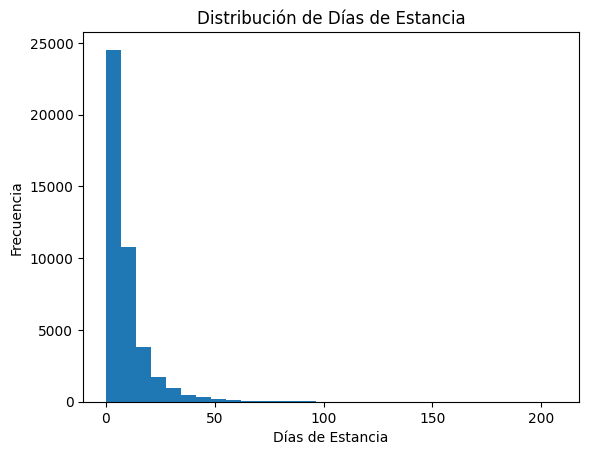

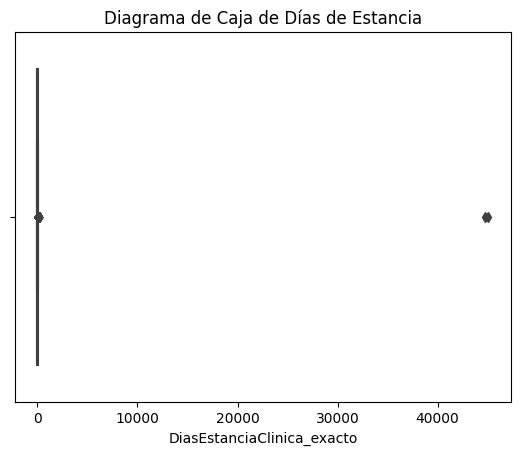

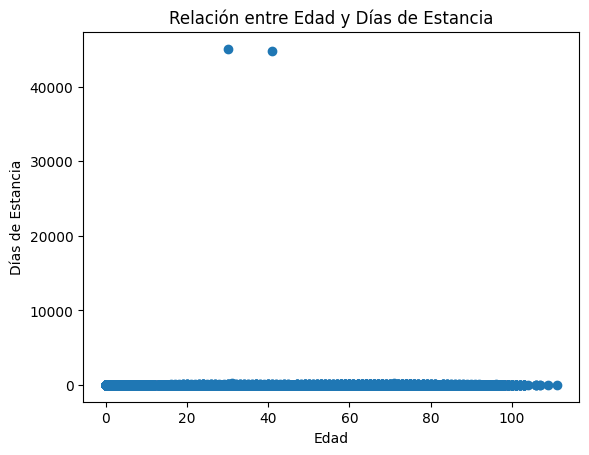

In [103]:
# Histograma de días de estancia
plt.hist(data['DiasEstanciaClinica'], bins=30)
plt.xlabel('Días de Estancia')
plt.ylabel('Frecuencia')
plt.title('Distribución de Días de Estancia')
plt.show()

# Diagrama de caja de días de estancia
sns.boxplot(x='DiasEstanciaClinica_exacto', data=data)
plt.title('Diagrama de Caja de Días de Estancia')
plt.show()

# Gráfico de dispersión entre días de estancia y una característica relevante
plt.scatter(data['EdadEgreso'], data['DiasEstanciaClinica_exacto'])
plt.xlabel('Edad')
plt.ylabel('Días de Estancia')
plt.title('Relación entre Edad y Días de Estancia')
plt.show()

In [114]:


# Supongamos que tienes un DataFrame llamado data_procesada
# Selección de columnas numéricas y eliminación de valores nulos
data_procesados = data_procesados.select_dtypes(include=['number']).dropna(axis=1)

# Supongamos que 'DiasEstanciaClinica_exacto' es tu columna de etiquetas (valores objetivo)
y = data_procesados['DiasEstanciaClinica_exacto']
X = data_procesados.drop(columns=['DiasEstanciaClinica_exacto'])


# split into training and testing dataset
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear una instancia del modelo de Árbol de Decisión para regresión
modelo_arbol = DecisionTreeRegressor(random_state=0)

# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

# Calcular diferentes métricas de regresión
mse = mean_squared_error(y_test, y_pred)  # Error Cuadrático Medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación (R^2)
explained_variance = explained_variance_score(y_test, y_pred)  # Varianza explicada
median_absolute_err = median_absolute_error(y_test, y_pred)  # Error absoluto mediano
mean_absolute_err = mean_absolute_error(y_test, y_pred)  # Error absoluto medio

# Imprimir las métricas
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)
print("Varianza Explicada:", explained_variance)
print("Error Absoluto Mediano:", median_absolute_err)
print("Error Absoluto Medio:", mean_absolute_err)



Error Cuadrático Medio (MSE): 0.25987844712395763
Coeficiente de Determinación (R^2): 0.9977024192428742
Varianza Explicada: 0.9977024326993011
Error Absoluto Mediano: 0.26908526620536577
Error Absoluto Medio: 0.33418385410081397


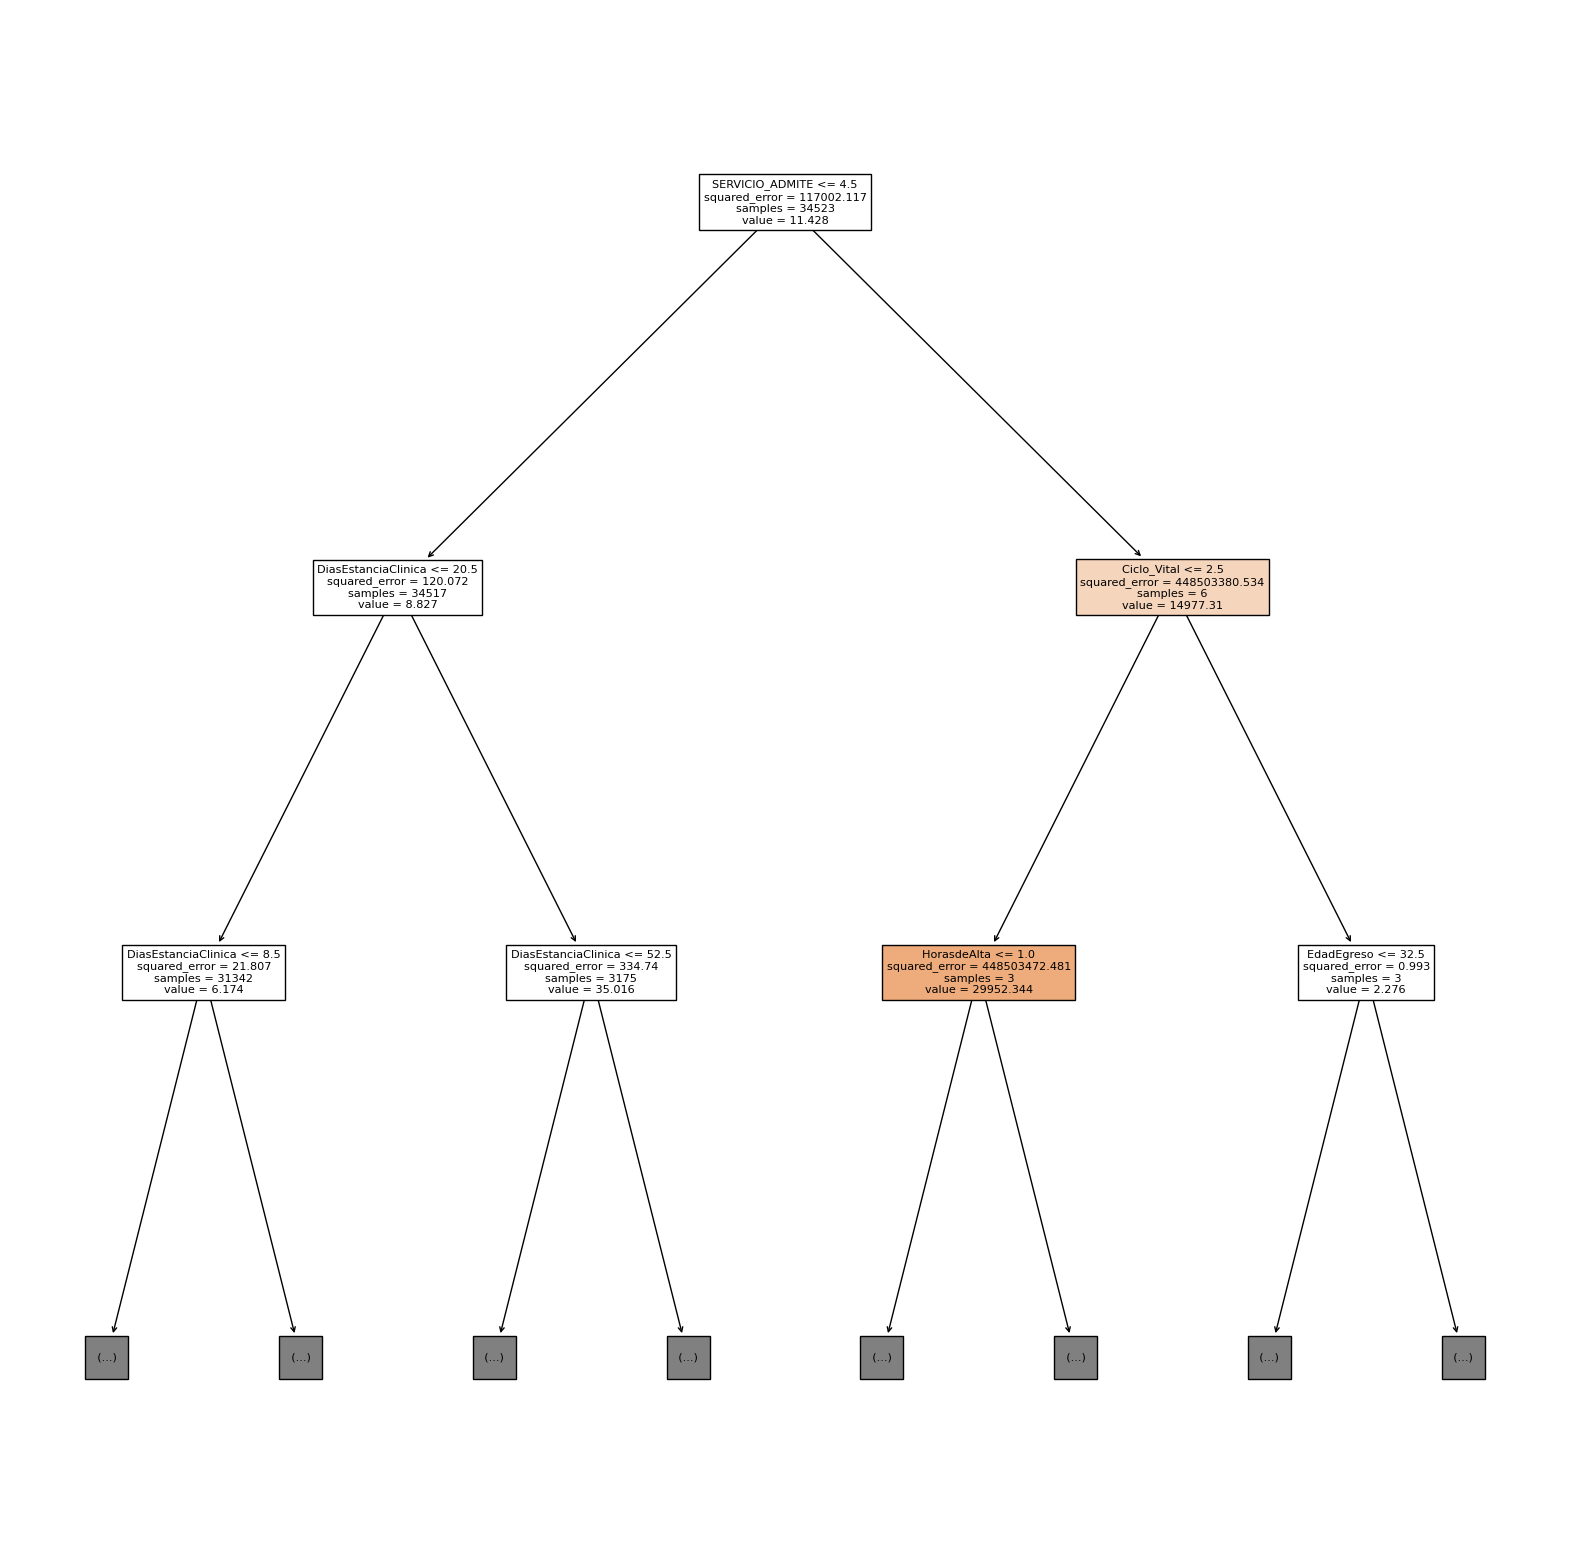

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) # 20% for testing dataset
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

plt.figure(figsize=[20,20])
plot_tree(dt , filled=True , max_depth=2 , feature_names=data_procesados.columns)
plt.show()

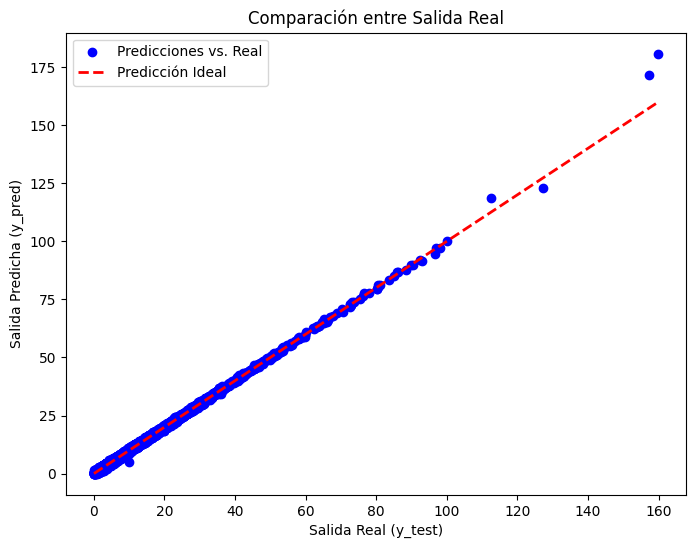

In [113]:
# Crear una figura para la gráfica
plt.figure(figsize=(8, 6))

# Graficar las salidas reales en el eje x y las salidas predichas en el eje y
plt.scatter(y_test, y_pred, c='blue', label='Predicciones vs. Real')

# Agregar etiquetas y título al gráfico
plt.xlabel('Salida Real (y_test)')
plt.ylabel('Salida Predicha (y_pred)')
plt.title('Comparación entre Salida Real')

# Agregar una línea diagonal para visualizar una predicción perfecta
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Predicción Ideal')

# Agregar una leyenda al gráfico
plt.legend()

# Mostrar la gráfica
plt.show()
